NNopt Optimizing Function
---

In [1]:
import numpy as np
def black_box_function(a):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
   
    return -np.float_power(a, 2) * np.sin(2 * a)


In [7]:
from nnopt.nnopt import Optimizer

Nopt = Optimizer(black_box_function, 
                 N=1, 
                 surrogate_hidden_layer=200, 
                 Rn=[(-10, 10)]) 


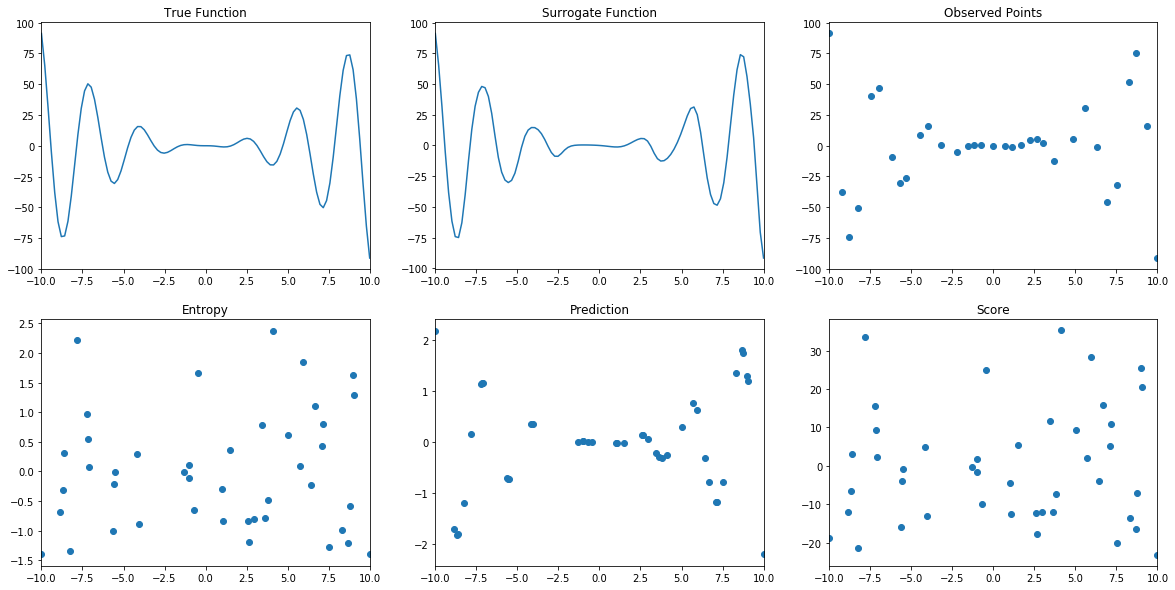

Maximum found [-10.] 91.29452507276277


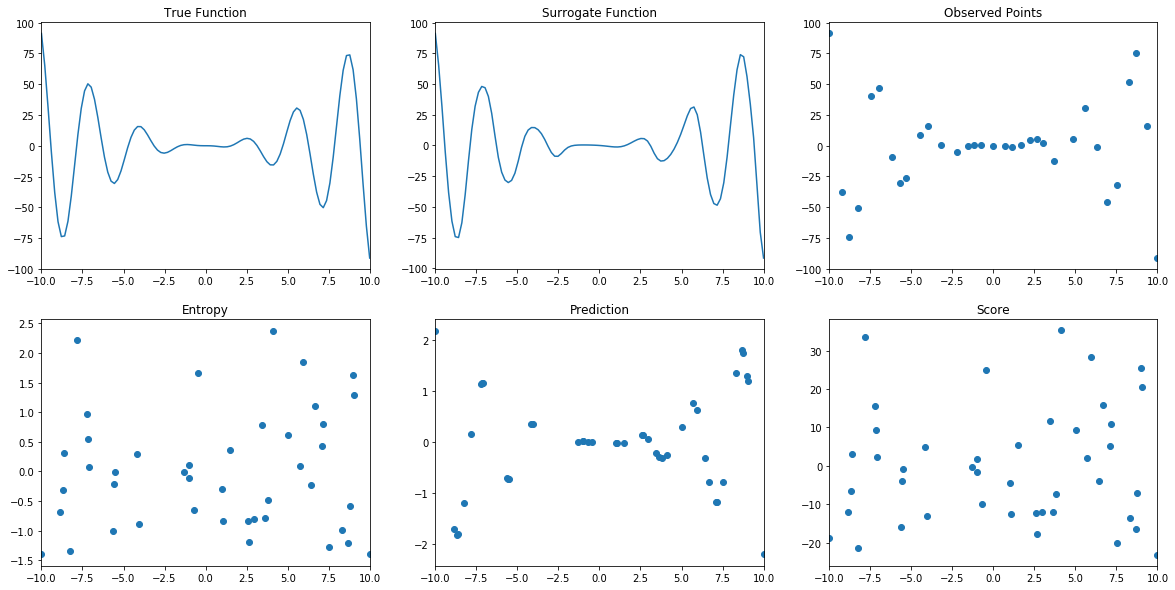

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display
display.clear_output(wait=True)
fig, ((true, surr, obs), (entr, pred, score)),  = plt.subplots(2, 3, figsize=(20, 10))

MINI = -10
MAXI = 10
true.set_xlim([MINI, MAXI])

true_x = np.linspace(MINI, MAXI, 100)

exploration = 15


def plot_ob_sur_ent():
    global pred, obs, surr, entr, score
    obs.cla()
    surr.cla()
    entr.cla()
    pred.cla()
    score.cla()
    
    obs.set_xlim([MINI, MAXI])
    surr.set_xlim([MINI, MAXI])
    entr.set_xlim([MINI, MAXI])
    pred.set_xlim([MINI, MAXI])
    score.set_xlim([MINI, MAXI])
    
    obs.set_title("Observed Points")
    surr.set_title("Surrogate Function")
    entr.set_title("Entropy")
    pred.set_title("Prediction")
    score.set_title("Score")


    sugg, preds, ents = Nopt.calc_suggestions()
    
    ys = []
    for tx in true_x:
        y = Nopt.predict(np.array([[tx]]))
        ys.append(y)
        
    display.clear_output(wait=True)

    X = np.array(Nopt.N_samples).reshape(-1)
    obs.scatter(X, Nopt.M_samples)
    surr.plot(true_x, ys)
    entr.scatter(sugg, ents)
    pred.scatter(sugg, preds)
    
    score.scatter(sugg, preds + ents * exploration)
    display.display(fig)

    

true.set_title("True Function")
obs.set_title("Observed Points")
surr.set_title("Surrogate Function")
entr.set_title("Entropy")

true_y = black_box_function(true_x)

true.plot(true_x, true_y)


Nopt.forget()
INIT = 3
for _ in range(INIT):
    Nopt.sample(verbose=False)


plot_ob_sur_ent()
time.sleep(15)
Nopt.fit(1000)
ITERS = 30
while ITERS > 0:
    sugg = Nopt.optimize(exploration=exploration)
    Nopt.sample(sugg, verbose=False)
    Nopt.fit(1000)
    plot_ob_sur_ent() 
    ITERS -= 1

print("Maximum found", Nopt.N_samples[np.argmax(Nopt.M_samples)], max(Nopt.M_samples))

In [ ]:
print(Nopt.N_samples)